# Proyecto Bancarrota - Coderhouse

## Integrantes

Brian Winkelman, Ignacio Baratto, Ingrid Rodrigues, Rodrigo Zelaya y Sebastián Salcedo

# Presentación del problema, preguntas y objetivos

## Objeto: ¿para qué se cuenta esta historia?

Se busca determinar la probabilidad de cierre de empresas Taiwanesas por declarar bancarrota (período 1999 - 2009), permitiendo identificar la solidez y rentabilidad de estas empresas en el país. Por lo tanto, se propone como objetivo predecir la probabilidad de que una empresa haya declarado o declare bancarrota.

## Contenido: ¿qué se quiere transmitir?

Se presenta por medio de la evaluación de variables financieras (relacionadas a activos, pasivos, patrimonio, etc.) las características de las empresas que cotizan en la bolsa de Taiwan y la posibilidad de declarar bancarrota en base a dichas características, donde se identifica la siguiente distribución:

 - No declaró banca rota = 97%
 - Declaró ancarrota = 3%

## Estructura: ¿cómo se relacionan los datos con la historia?

Breve resumen sobre Taiwán:

- Idioma: Chino Madnarin.
- Habitantes: 1,100 millones ; nativos 950 millones, otros 150 millones.
- Capital: Taipéi.
- Moneda: Nuevo dólar taiwanés.
- Sistema político: Democracia presidencialista, el presidente actúa como jefe de estado y la Asamblea Nacional sirve como órgano legislativo.
- Sectores Estratégicos: Alimentación, Automoción, Biotecnología, Medicina y Salud.
- Ranking de inversión: A pesar del pequeño tamaño de la isla, la economía taiwanesa se encuentra en el puesto 16° a nivel mundial en términos de paridad de poder adquisitivo per cápita. En el ámbito de negocios, Taiwán obtiene calificaciones favorables; la agencia de rating S&P califica a Taiwán con un nivel de riesgo de AA mientras que COFACE le otorga un nivel A.

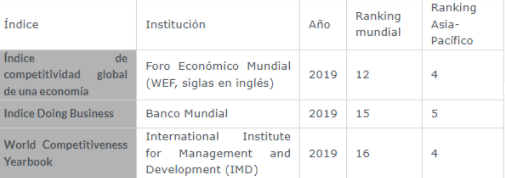


- Bolsa de valores de Taiwan: Taiwan Stock Exchange Corporation (TWSE) es una institución financiera ubicada en Taipei, Taiwán. TWSE fue creada en 1961 y comenzó a operar como bolsa de valores el 9 de febrero de 1962. Está regulada por la Comisión de Supervisión Financiera.

Se toman en consideración las siguientes variables referidas a empresas que cotizaron en la bolsa de valores de Taiwán entre 1999 y 2009:

- NetIncometoTotalAssets: esta variable captura lo que se conoce como el retorno sobre activos, que se define como el ratio entre el ingreso neto de una compañía y el total de sus activos. Por lo tanto, es un coeficiente de rentabilidad. A mayor (menor) ratio, mayor (menor) retorno sobre activos.	
- Networth/Assets: esta variable se define como la resta entre el total de activos y el total de pasivos (patrimonio) de una empresa, dividido entre el total de activos. De esta forma, captura el porcentaje que representa el patrimonio de una empresa en el total de activos. A mayores (menores) porcentajes, mayor (menor) es el patrimonio de una empresa y menor (mayor) es su deuda en relación al total de sus activos.
- PersistentEPSintheLastFourSeasons: esta variable captura la magnitud en que las ganancias por acción publicadas resultaron persistentes en las últimas cuatro temporadas/años calendario. A mayor (menor) persistencia, mayor (menor) rendimiento por acción.
- RetainedEarningstoTotalAssets: esta variable representa el ratio entre las ganancias retenidas de una empresa y el total de sus activos. A mayor (menor) ratio, mayores (menores) son las ganancias retenidas por la empresa en relación a sus activos.
- WorkingCapitaltoTotalAssets: esta variable representa el ratio entre los activos líquidos netos (capital de trabajo) de una empresa y el total de sus activos. A través de este ratio se evalúa la solvencia a corto plazo de una empresa. A mayor (menor) ratio, mayor (menor) es la solvencia a corto plazo.
- NetIncometoStockholder'sEquity: esta variable se define como el ratio entre el ingreso neto de una compañía y el capital contable (activos que permanecen una vez que se han liquidado todos los pasivos) de una empresa. Por lo tanto, es un coeficiente que permite evaluar el estado general financiero de una empresa. A mayor (menor) ratio, mayor (menores) es la capaciad de una empresa de cubrir sus obligaciones (pasivos).
- CurrentLiabilitytoCurrentAssets: esta variable representa el ratio entre los pasivos a corto plazo de una empresa y el total de sus activos a corto plazo. Así, permite evaluar la liquidez a corto plazo de una empresa. A mayor (menor) ratio, menor (mayor) es la liquidez a corto plazo.
- NetValuePerShare(A): el valor liquidativo por acción se calcula dividiendo el valor liquidativo por el número total de acciones (de tipo A) en circulación. De esta forma, representa el valor liquidativo por acción (de tipo A). A mayor (menor) valor, mayor (menor) es el valor por acción.
- WorkingCapital/Equity: esta variable representa el ratio entre los activos líquidos netos (capital de trabajo) de una emrpesa y el total de su patrimonio. Similar a la variable "WorkingCapitaltoTotalAssets", este ratio evalúa la solvencia a largo plazo de una empresa. A mayor (menor) ratio, mayor (menores) es la solvencia a largo plazo.
- Total expense/Assets: esta variable captura el porcentaje de gastos totales de una empresa en relación al total de activos. A mayor (menor) porcentaje, mayor (menor) es el nivel de gastos de una empresa en relación a sus activos.
- CFOtoAssets: esta variable captura el porcentaje de flujo de de efectivo dispuesto para operaciones sobre el total de activos de una empresa. Sirve como indicador de la eficiencia de una empresa a la hora de utilizar sus activos para cobrar efectivo. A mayor (menor) ratio, mayor (menor) eficiencia.
- Taxrate(A): representa la tasa de impuestos corporativos que paga una empresa por operar.
- Cash/TotalAssets: esta variable muestra la proporción de los activos de una empresa que se componen de efectivo e inversiones a corto plazo. A mayor (menor) ratio, mayores (menores) son los activos compuestos por efectivo e inversiones a corto plazo. 
- GrossProfittoSales: esta variable representa la proporción de ganancia bruta de una empresa (costo de los bienes vendidos menos la cifra total de ventas netas) sobre sus ventas totales. A mayor (menor) ratio, mayor (menor) es la ganancia bruta.

El análisis presentado posteriormente en la sección titulada 'Data Wrangling y Exploratory Data Analysis (EDA)', permite identificar y exponer las siguientes tendencias:

- Hay un número muy pequeño de empresas declararon bancarrota en el período 1999 - 2009.
- En promedio, las empresas que declararon bancarrota presentan mayor nivel de liquidez a corto plazo y mayores gastos en relación a sus activos, en comparación con las empresas que no declararon bancarrota y siguen cotizando en bolsa.
- A su vez, en promedio, éstas empresas también presentan menor nivel de ingreso, patrimonio, ganancia retenida, capital de trabajo, ingreso neto, valor liquidativo por acción, flujo de efectivo para operar, impuestos pagos, efectivo y ganancia bruta en relación a su total de activos, en comparación con las empresas que no declararon bancarrota y siguen cotizando en bolsa.

In [1]:
#Importación de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix

import scipy.stats as stats

In [2]:
#No limitamos output de tablas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Acquisition

El conjunto de datos fue extraído de la página Kaggle y contiene información financiera de empresas que cotizaron en la bolsa de valores de Taiwán en el período 1999 - 2009. La elección del dataset se basó en las preferencias de los integrantes, encontrando un balance entre los gustos personales y el orden y la robustez de los datos. Así, seleccionamos un conjunto de datos "limpio" y completo con el fin de predecir la posibilidad de que una empresa declare bancarrota.

In [3]:
#Creamos conexción a repositorio de GitHub creado para el proyecto con acceso público
url = 'https://raw.githubusercontent.com/lechori/proyectobancarrota/master/bankruptcy-data.csv'

In [4]:
#Lectura de dataset
df = pd.read_csv(url)

# Data Wrangling y Exploratoy Data Analysis (EDA)

En esta sección, se realiza una mínima limpieza y reducción de los datos para luego realizar un análsis detallado tanto del comportamiento de cada variable como de la interacción entre cada una de las variables. Cabe destacar que la muestra del conjunto de datos está fuertemente desbalanceada, problema que se abordará al momento de construir el modelo de predicción.

In [5]:
#Removemos espacios en nombres de columnas
df.columns = df.columns.str.replace(' ', '')

In [6]:
#Pantallazo inicial del dataset
df.head()

,Bankrupt?,ROA(C)beforeinterestanddepreciationbeforeinterest,ROA(A)beforeinterestand%aftertax,ROA(B)beforeinterestanddepreciationaftertax,OperatingGrossMargin,RealizedSalesGrossMargin,OperatingProfitRate,Pre-taxnetInterestRate,After-taxnetInterestRate,Non-industryincomeandexpenditure/revenue,Continuousinterestrate(aftertax),OperatingExpenseRate,Researchanddevelopmentexpenserate,Cashflowrate,Interest-bearingdebtinterestrate,Taxrate(A),NetValuePerShare(B),NetValuePerShare(A),NetValuePerShare(C),PersistentEPSintheLastFourSeasons,CashFlowPerShare,RevenuePerShare(Yuan¥),OperatingProfitPerShare(Yuan¥),PerShareNetprofitbeforetax(Yuan¥),RealizedSalesGrossProfitGrowthRate,OperatingProfitGrowthRate,After-taxNetProfitGrowthRate,RegularNetProfitGrowthRate,ContinuousNetProfitGrowthRate,TotalAssetGrowthRate,NetValueGrowthRate,TotalAssetReturnGrowthRateRatio,CashReinvestment%,CurrentRatio,QuickRatio,InterestExpenseRatio,Totaldebt/Totalnetworth,Debtratio%,Networth/Assets,Long-termfundsuitabilityratio(A),Borrowingdependency,Contingentliabilities/Networth,Operatingprofit/Paid-incapital,Netprofitbeforetax/Paid-incapital,Inventoryandaccountsreceivable/Netvalue,TotalAssetTurnover,AccountsReceivableTurnover,AverageCollectionDays,InventoryTurnoverRate(times),FixedAssetsTurnoverFrequency,NetWorthTurnoverRate(times),Revenueperperson,Operatingprofitperperson,Allocationrateperperson,WorkingCapitaltoTotalAssets,QuickAssets/TotalAssets,CurrentAssets/TotalAssets,Cash/TotalAssets,QuickAssets/CurrentLiability,Cash/CurrentLiability,CurrentLiabilitytoAssets,OperatingFundstoLiability,Inventory/WorkingCapital,Inventory/CurrentLiability,CurrentLiabilities/Liability,WorkingCapital/Equity,CurrentLiabilities/Equity,Long-termLiabilitytoCurrentAssets,RetainedEarningstoTotalAssets,Totalincome/Totalexpense,Totalexpense/Assets,CurrentAssetTurnoverRate,QuickAssetTurnoverRate,WorkingcapitcalTurnoverRate,CashTurnoverRate,CashFlowtoSales,FixedAssetstoAssets,CurrentLiabilitytoLiability,CurrentLiabilitytoEquity,EquitytoLong-termLiability,CashFlowtoTotalAssets,CashFlowtoLiability,CFOtoAssets,CashFlowtoEquity,CurrentLiabilitytoCurrentAssets,Liability-AssetsFlag,NetIncometoTotalAssets,TotalassetstoGNPprice,No-creditInterval,GrossProfittoSales,NetIncometoStockholder'sEquity,LiabilitytoEquity,DegreeofFinancialLeverage(DFL),InterestCoverageRatio(InterestexpensetoEBIT),NetIncomeFlag,EquitytoLiability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0

In [7]:
#Estadísticas descriptivas
df.describe().T.apply(lambda s: s.apply(lambda x: format(x, 'g')))

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819,0.0322628,0.17671,0,0,0,0,1
ROA(C)beforeinterestanddepreciationbeforeinterest,6819,0.50518,0.0606856,0,0.476527,0.502706,0.535563,1
ROA(A)beforeinterestand%aftertax,6819,0.558625,0.06562,0,0.535543,0.559802,0.589157,1
ROA(B)beforeinterestanddepreciationaftertax,6819,0.553589,0.0615948,0,0.527277,0.552278,0.584105,1
OperatingGrossMargin,6819,0.607948,0.0169338,0,0.600445,0.605997,0.613914,1
RealizedSalesGrossMargin,6819,0.607929,0.0169161,0,0.600434,0.605976,0.613842,1
OperatingProfitRate,6819,0.998755,0.01301,0,0.998969,0.999022,0.999095,1
Pre-taxnetInterestRate,6819,0.79719,0.012869,0,0.797386,0.797464,0.797579,1
After-taxnetInterestRate,6819,0.809084,0.0136007,0,0.809312,0.809375,0.809469,1
Non-industryincomeandexpenditure/revenue,6819,0.303623,0.0111634,0,0.303466,0.303525,0.303585,1


In [8]:
#Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Bankrupt?                                          6819 non-null   int64  
 1   ROA(C)beforeinterestanddepreciationbeforeinterest  6819 non-null   float64
 2   ROA(A)beforeinterestand%aftertax                   6819 non-null   float64
 3   ROA(B)beforeinterestanddepreciationaftertax        6819 non-null   float64
 4   OperatingGrossMargin                               6819 non-null   float64
 5   RealizedSalesGrossMargin                           6819 non-null   float64
 6   OperatingProfitRate                                6819 non-null   float64
 7   Pre-taxnetInterestRate                             6819 non-null   float64
 8   After-taxnetInterestRate                           6819 non-null   float64
 9   Non-indu

In [9]:
#Dimensión del dataset
df.shape

(6819, 96)

In [10]:
#Cantidad de tipos de datos en el dataset
df.dtypes.value_counts()

float64    93
int64       3
dtype: int64

In [11]:
#Cantidad de valores nulos en el dataset
df.isnull().any().value_counts()

False    96
dtype: int64

In [12]:
#Muestra de la variable objetivo: se identifica una muestra desbalanceada
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [13]:
#Muestra de la variable objetivo expresada en %
df['Bankrupt?'].value_counts(True)*100

0    96.77372
1     3.22628
Name: Bankrupt?, dtype: float64

In [14]:
print('No Bankruptcy:',round(df['Bankrupt?'].value_counts(True)[0]*100),'%\n','Bankruptcy:',round(df['Bankrupt?'].value_counts(True)[1]*100),'%')

No Bankruptcy: 97 %
 Bankruptcy: 3 %


<AxesSubplot:>

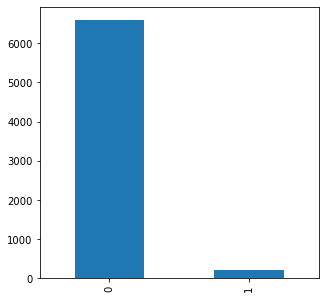

In [15]:
f, ax = plt.subplots(figsize=(5,5))
df['Bankrupt?'].value_counts().plot.bar()

## Filtrado de los datos

Reducimos el análisis a las variables con mayor correlación (tanto positiva como negativa) respecto a la variable objetivo ('Bankrupt?'), estableciendo un límite absoluto de 10% de correlación. Luego, se excluyen de estas features aquellas que tienen una correlación muy alta entre sí (se establece límite absoluto de 80% de correlación):

- NetIncometoTotalAssets	
- Networth/Assets
- PersistentEPSintheLastFourSeasons
- RetainedEarningstoTotalAssets
- WorkingCapitaltoTotalAssets
- NetIncometoStockholder'sEquity
- CurrentLiabilitytoCurrentAssets
- NetValuePerShare(A)
- WorkingCapital/Equity
- Liability-AssetsFlag
- Totalexpense/Assets
- CFOtoAssets
- Taxrate(A)
- Cash/TotalAssets
- GrossProfittoSales

Además, se identifica un feature con una muestra altamente desbalanceada ('Liability-AssetsFlag'), la cual se elimina por completo del dataset.

Finalmente, se tratan los outliers para que el conjunto de datos no se vea afectado por los valores extremos de cada variable, por medio del método de 'capping' y 'flooring'.

In [16]:
correlacion = pd.DataFrame(df.corrwith(df['Bankrupt?']).abs().sort_values())
correlacion.rename(columns={0:'Correlación con variable objetivo'}, inplace=True )
correlacion.drop(index='NetIncomeFlag', inplace=True)
correlacion.drop(index='Bankrupt?', inplace=True)
correlacion

,Correlación con variable objetivo
OperatingProfitRate,0.000230
RealizedSalesGrossProfitGrowthRate,0.000458
CashFlowtoSales,0.000479
Long-termLiabilitytoCurrentAssets,0.000778
Inventory/CurrentLiability,0.000822
InventoryTurnoverRate(times),0.001376
Inventory/WorkingCapital,0.001906
CurrentRatio,0.002211
InterestExpenseRatio,0.002681
Allocationrateperperson,0.002829


In [17]:
#Se excluyen las variables que tienen una correlación (en valor absoluto) menor al 10% respecto a la variable objetivo
df_highcorrtarget = df[['Bankrupt?',
                 'NetIncometoTotalAssets',
                 'ROA(A)beforeinterestand%aftertax',
                 'ROA(B)beforeinterestanddepreciationaftertax',
                 'ROA(C)beforeinterestanddepreciationbeforeinterest',
                 'Networth/Assets',
                 'Debtratio%',
                 'PersistentEPSintheLastFourSeasons',
                 'RetainedEarningstoTotalAssets',
                 'Netprofitbeforetax/Paid-incapital',
                 'PerShareNetprofitbeforetax(Yuan¥)',
                 'CurrentLiabilitytoAssets',
                 'WorkingCapitaltoTotalAssets',
                 "NetIncometoStockholder'sEquity",
                 'Borrowingdependency',
                 'CurrentLiabilitytoCurrentAssets',
                 'LiabilitytoEquity',
                 'NetValuePerShare(A)',
                 'NetValuePerShare(B)',
                 'NetValuePerShare(C)',
                 'CurrentLiabilitytoEquity',
                 'CurrentLiabilities/Equity',
                 'WorkingCapital/Equity',
                 'OperatingProfitPerShare(Yuan¥)',
                 'Operatingprofit/Paid-incapital',
                 'Liability-AssetsFlag',
                 'Totalexpense/Assets',
                 'EquitytoLong-termLiability',
                 'CFOtoAssets',
                 'Taxrate(A)',
                 'Cash/TotalAssets',
                 'GrossProfittoSales',
                 'OperatingGrossMargin']]

In [18]:
#Para evitar el posible problema de la multicolinearidad, se excluyen las features que entre sí tienen una correlación mayor a 80%
corr_matrix = df_highcorrtarget.drop(['Bankrupt?'], axis=1).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.80)]
df_reduced = df_highcorrtarget.drop(to_drop, axis=1)

In [19]:
#Visualizamos y describimos dataset reducido
df_reduced.head()

,Bankrupt?,NetIncometoTotalAssets,Networth/Assets,PersistentEPSintheLastFourSeasons,RetainedEarningstoTotalAssets,WorkingCapitaltoTotalAssets,NetIncometoStockholder'sEquity,CurrentLiabilitytoCurrentAssets,NetValuePerShare(A),WorkingCapital/Equity,Liability-AssetsFlag,Totalexpense/Assets,CFOtoAssets,Taxrate(A),Cash/TotalAssets,GrossProfittoSales
0,1,0.716845,0.792424,0.169141,0.903225,0.672775,0.827890,0.118250,0.147950,0.721275,0,0.064856,0.520382,0.0,0.004094,0.601453
1,1,0.795297,0.828824,0.208944,0.931065,0.751111,0.839969,0.047775,0.182251,0.731975,0,0.025516,0.567101,0.0,0.014948,0.610237
2,1,0.774670,0.792484,0.180581,0.909903,0.829502,0.836774,0.025346,0.177911,0.742729,0,0.021387,0.538491,0.0,0.000991,0.601449
3,1,0.739555,0.848535,0.193722,0.906902,0.725754,0.834697,0.067250,0.154187,0.729825,0,0.024161,0.604105,0.0,0.018851,0.583538
4,1,0.795016,0.893491,0.212537,0.913850,0.751822,0.839973,0.047725,0.167502,0.732000,0,0.026385,0.578469,0.0,0.014161,0.598782


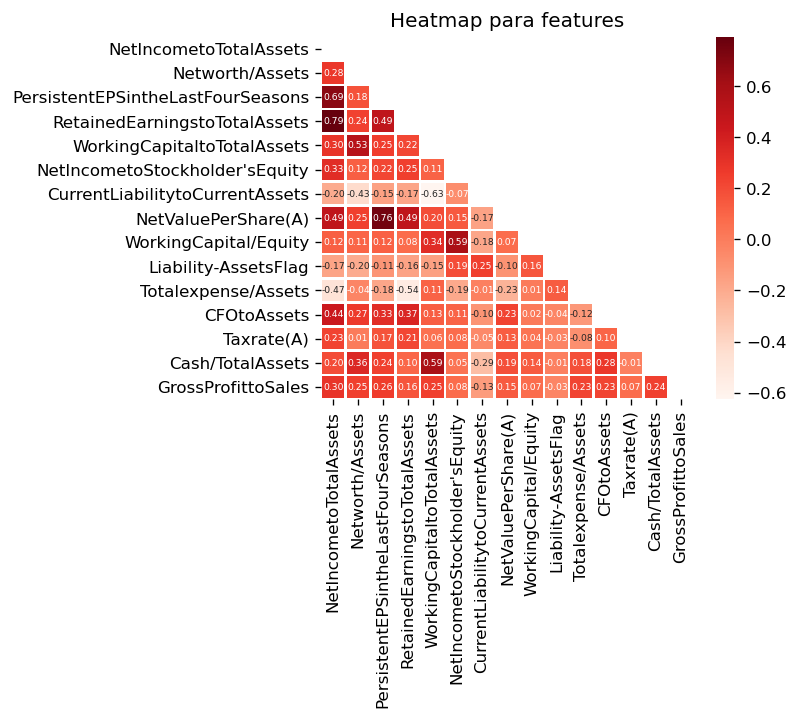

In [20]:
#Heatmap de features

features = df_reduced.drop(['Bankrupt?'], axis=1)
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(features.corr(),dtype = bool))
sns.heatmap(features.corr(), mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'Reds', annot_kws={"size":5.5})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Heatmap para features')
plt.show()

In [21]:
#Tipo de datos del dataset reducido
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Bankrupt?                          6819 non-null   int64  
 1   NetIncometoTotalAssets             6819 non-null   float64
 2   Networth/Assets                    6819 non-null   float64
 3   PersistentEPSintheLastFourSeasons  6819 non-null   float64
 4   RetainedEarningstoTotalAssets      6819 non-null   float64
 5   WorkingCapitaltoTotalAssets        6819 non-null   float64
 6   NetIncometoStockholder'sEquity     6819 non-null   float64
 7   CurrentLiabilitytoCurrentAssets    6819 non-null   float64
 8   NetValuePerShare(A)                6819 non-null   float64
 9   WorkingCapital/Equity              6819 non-null   float64
 10  Liability-AssetsFlag               6819 non-null   int64  
 11  Totalexpense/Assets                6819 non-null   float

In [22]:
#Dimension del dataset reducido
df_reduced.shape

(6819, 16)

In [23]:
df_reduced['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

## Limpieza de los datos

A continuación, se realiza una limpieza de los datos por medio de los métodos previamente mencionados, llamados 'capping' y 'flooring': se identifica el conjunto de datos que encuentra por debajo del percentil 0.5% y por encima del percentil 99,5%. Este procedimeinto permite reclasificar los valores extremos con el fin de reducir la dispersión de los datos. Además, se elimina la variable 'Liability-AssetsFlag', ya que toma un único valor: 0.

In [24]:
#Se identifican los valores mencionados
for col in df_reduced.columns:
    percentiles = df_reduced[col].quantile([0.005, 0.995]).values
    df_reduced[col] = np.clip(df_reduced[col], percentiles[0], percentiles[1])

In [25]:
#Se evalúa si la muestra se ve afectada por el método aplicado
df_reduced['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [26]:
df_reduced['Liability-AssetsFlag'].value_counts()

0    6819
Name: Liability-AssetsFlag, dtype: int64

In [27]:
new_df = df_reduced.drop(['Liability-AssetsFlag'], axis=1)

## Análisis univariado, bivariado y multivariado

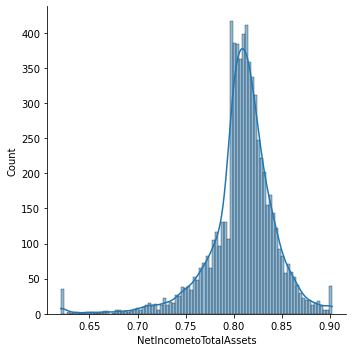

In [28]:
sns.displot(new_df['NetIncometoTotalAssets'], kde = True)
plt.show()

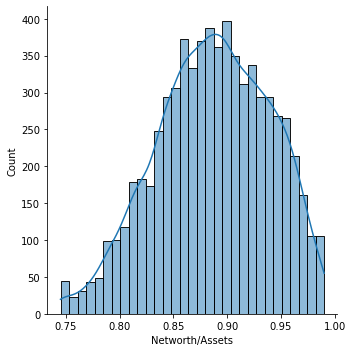

In [29]:
sns.displot(new_df['Networth/Assets'], kde = True)
plt.show()

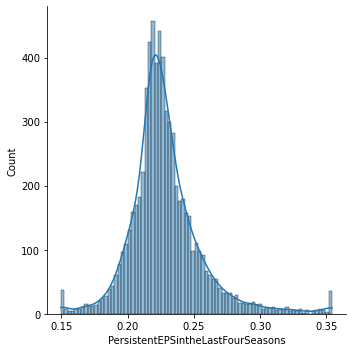

In [30]:
sns.displot(new_df['PersistentEPSintheLastFourSeasons'], kde = True)
plt.show()

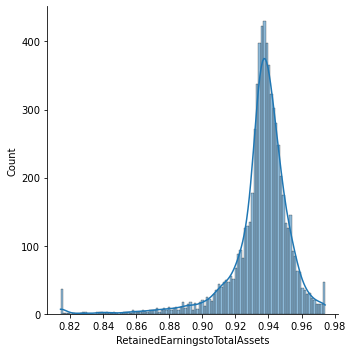

In [31]:
sns.displot(new_df['RetainedEarningstoTotalAssets'], kde = True)
plt.show()

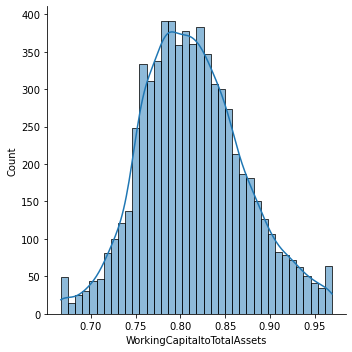

In [32]:
sns.displot(new_df['WorkingCapitaltoTotalAssets'], kde = True)
plt.show()

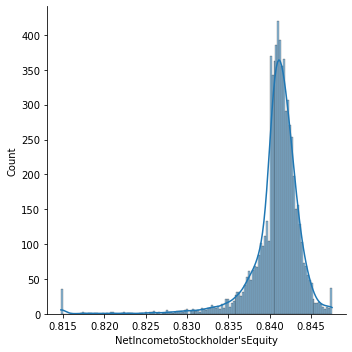

In [33]:
sns.displot(new_df["NetIncometoStockholder'sEquity"], kde = True)
plt.show()

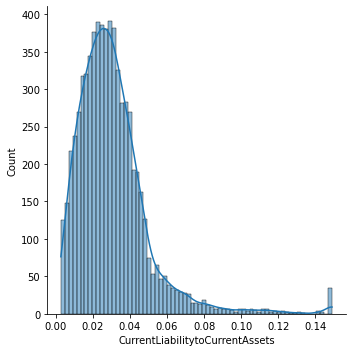

In [34]:
sns.displot(new_df['CurrentLiabilitytoCurrentAssets'], kde = True)
plt.show()

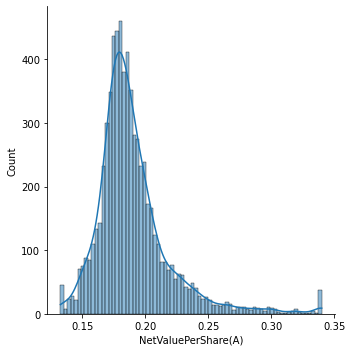

In [35]:
sns.displot(new_df['NetValuePerShare(A)'], kde = True)
plt.show()

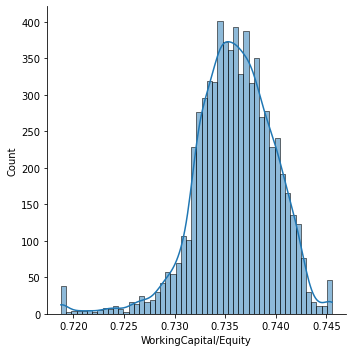

In [36]:
sns.displot(new_df['WorkingCapital/Equity'], kde = True)
plt.show()

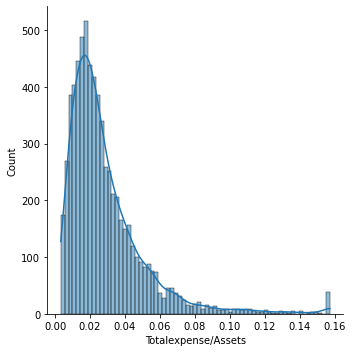

In [37]:
sns.displot(new_df['Totalexpense/Assets'], kde = True)
plt.show()

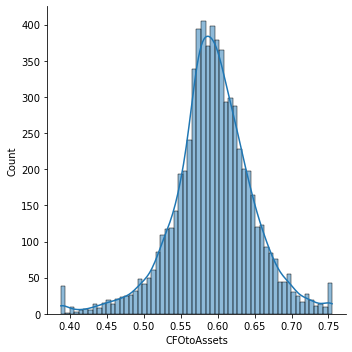

In [38]:
sns.displot(new_df['CFOtoAssets'], kde = True)
plt.show()

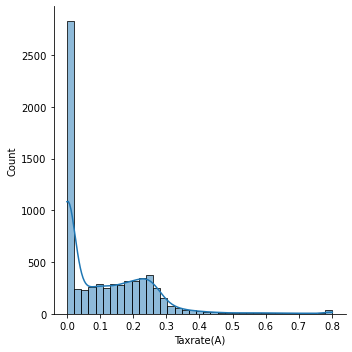

In [39]:
sns.displot(new_df['Taxrate(A)'], kde = True)
plt.show()

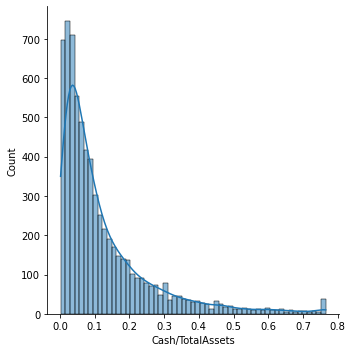

In [40]:
sns.displot(new_df['Cash/TotalAssets'], kde = True)
plt.show()

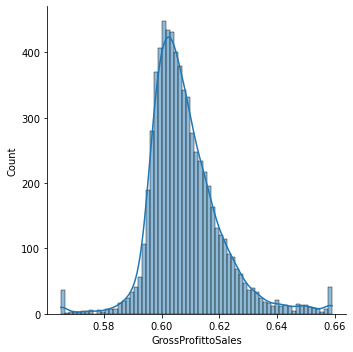

In [41]:
sns.displot(new_df['GrossProfittoSales'], kde = True)
plt.show()

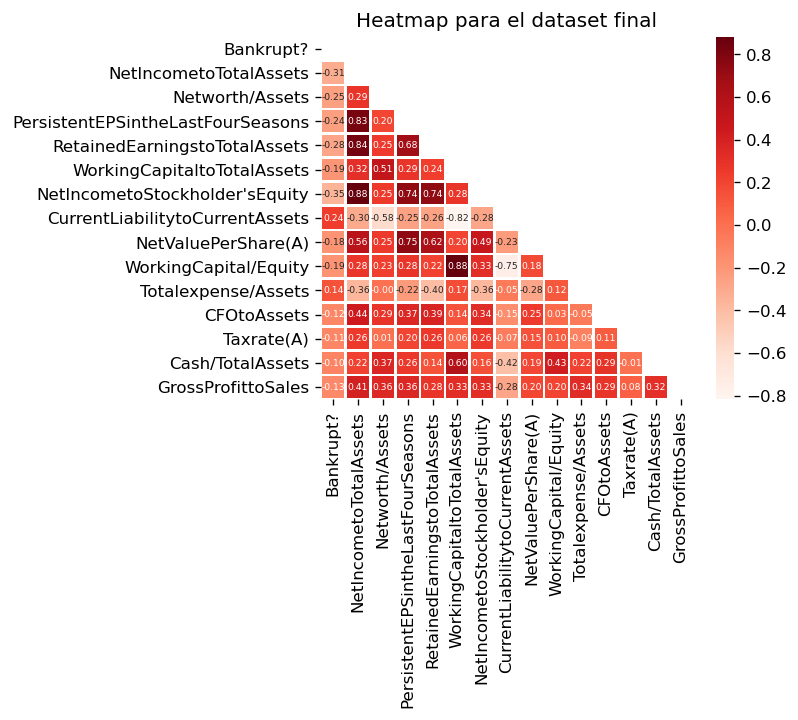

In [42]:
#Heatmap de las variables seleccionadas y variable objetivo

plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(new_df.corr(),dtype = bool))
sns.heatmap(new_df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'Reds', annot_kws={"size":5.5})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Heatmap para el dataset final')
plt.show()

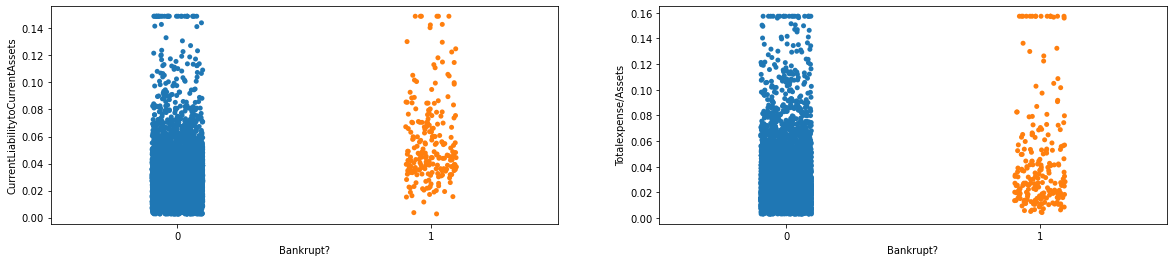

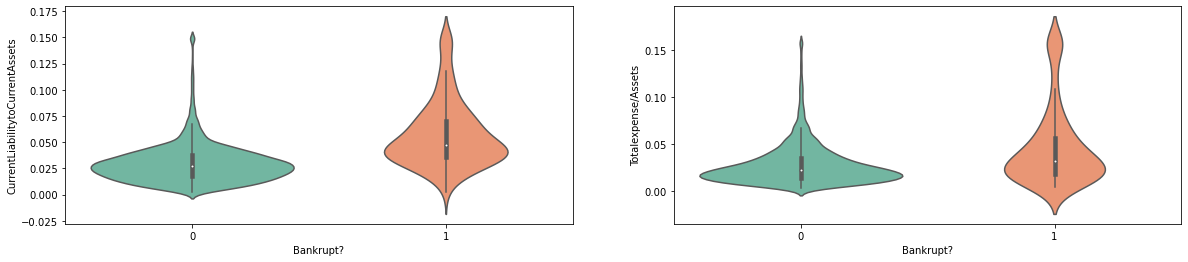

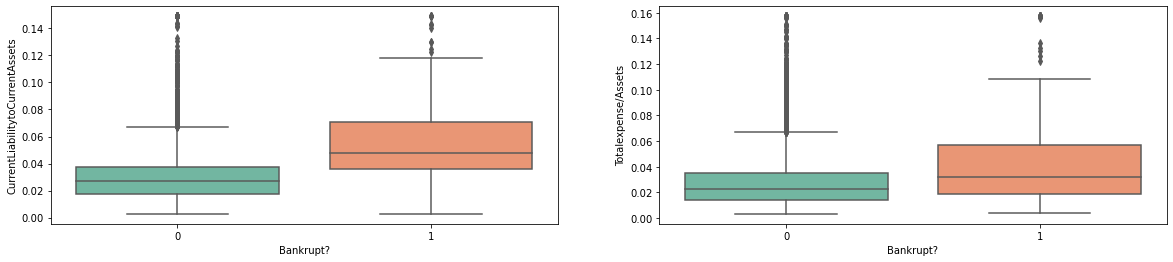

In [43]:
#Relación entre variables con correlación positiva y variable objetivo

fig, axs = plt.subplots(1, 2, figsize=(20, 4))

sns.stripplot(x = new_df['Bankrupt?'], y = new_df['CurrentLiabilitytoCurrentAssets'], data=new_df, ax=axs[0])
sns.stripplot(x = new_df['Bankrupt?'], y = new_df['Totalexpense/Assets'], data=new_df, ax=axs[1])


fig, axs = plt.subplots(1, 2, figsize=(20, 4))

sns.violinplot(x = new_df['Bankrupt?'], y = new_df['CurrentLiabilitytoCurrentAssets'], data=new_df,palette = 'Set2', ax=axs[0])
sns.violinplot(x = new_df['Bankrupt?'], y = new_df['Totalexpense/Assets'], data=new_df,palette = 'Set2', ax=axs[1])


fig, axs = plt.subplots(1, 2, figsize=(20, 4))

sns.boxplot(x = new_df['Bankrupt?'], y = new_df['CurrentLiabilitytoCurrentAssets'], data=new_df,palette = 'Set2', ax=axs[0])
sns.boxplot(x = new_df['Bankrupt?'], y = new_df['Totalexpense/Assets'], data=new_df,palette = 'Set2', ax=axs[1])



plt.show()

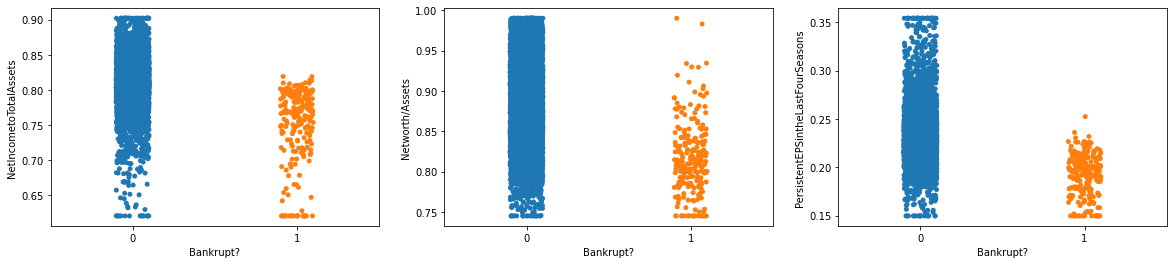

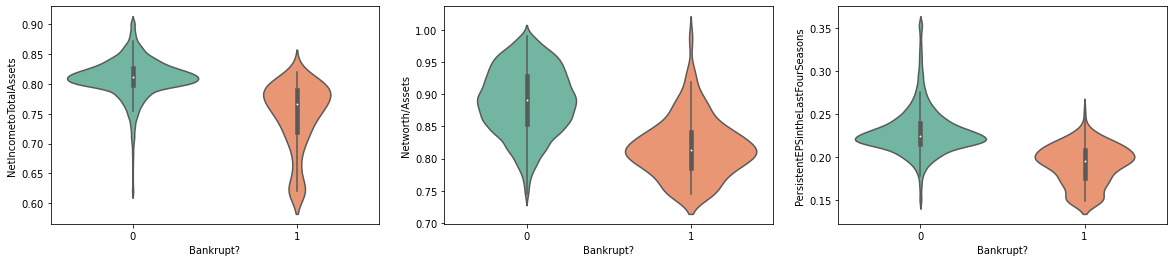

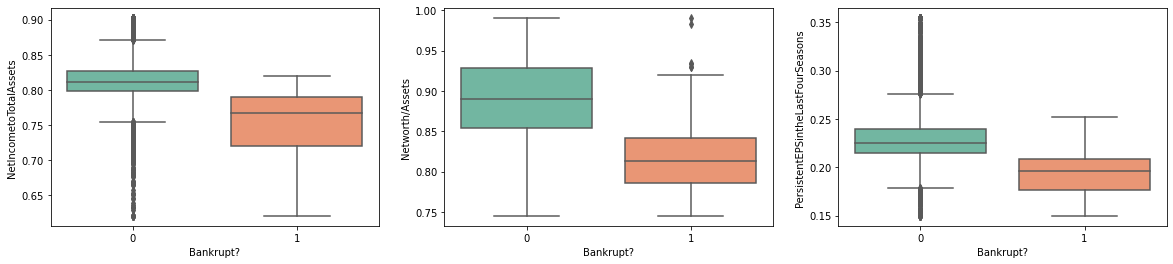

In [44]:
#Relación entre variables con correlación negativa y variable objetivo

fig, axs = plt.subplots(1, 3, figsize=(20, 4))

sns.stripplot(x = new_df['Bankrupt?'], y = new_df['NetIncometoTotalAssets'], data=new_df, ax=axs[0])
sns.stripplot(x = new_df['Bankrupt?'], y = new_df['Networth/Assets'], data=new_df, ax=axs[1])
sns.stripplot(x = new_df['Bankrupt?'], y = new_df['PersistentEPSintheLastFourSeasons'], data=new_df, ax=axs[2])


fig, axs = plt.subplots(1, 3, figsize=(20, 4))

sns.violinplot(x = new_df['Bankrupt?'], y = new_df['NetIncometoTotalAssets'], data=new_df,palette = 'Set2', ax=axs[0])
sns.violinplot(x = new_df['Bankrupt?'], y = new_df['Networth/Assets'], data=new_df,palette = 'Set2', ax=axs[1])
sns.violinplot(x = new_df['Bankrupt?'], y = new_df['PersistentEPSintheLastFourSeasons'], data=new_df,palette = 'Set2', ax=axs[2])


fig, axs = plt.subplots(1, 3, figsize=(20, 4))

sns.boxplot(x = new_df['Bankrupt?'], y = new_df['NetIncometoTotalAssets'], data=new_df,palette = 'Set2', ax=axs[0])
sns.boxplot(x = new_df['Bankrupt?'], y = new_df['Networth/Assets'], data=new_df,palette = 'Set2', ax=axs[1])
sns.boxplot(x = new_df['Bankrupt?'], y = new_df['PersistentEPSintheLastFourSeasons'], data=new_df,palette = 'Set2', ax=axs[2])



plt.show()

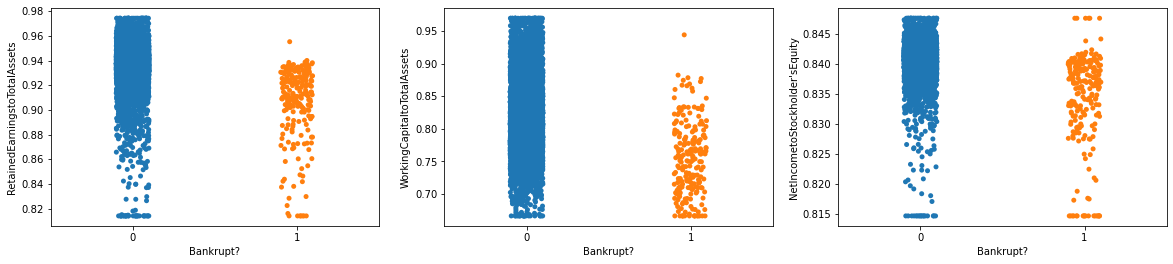

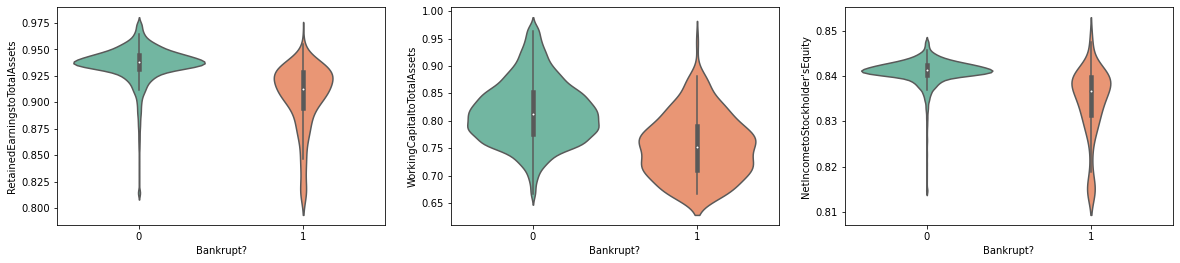

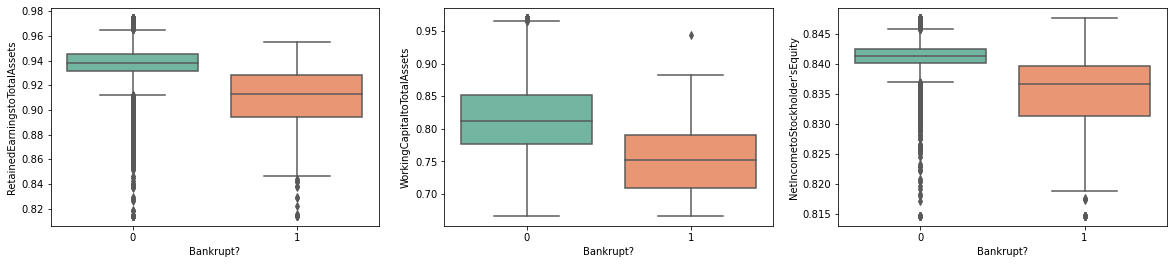

In [45]:
#Relación entre variables con correlación negativa y variable objetivo (continuación)

fig, axs = plt.subplots(1, 3, figsize=(20, 4))

sns.stripplot(x = new_df['Bankrupt?'], y = new_df['RetainedEarningstoTotalAssets'], data=new_df, ax=axs[0])
sns.stripplot(x = new_df['Bankrupt?'], y = new_df['WorkingCapitaltoTotalAssets'], data=new_df, ax=axs[1])
sns.stripplot(x = new_df['Bankrupt?'], y = new_df["NetIncometoStockholder'sEquity"], data=new_df, ax=axs[2])


fig, axs = plt.subplots(1, 3, figsize=(20, 4))

sns.violinplot(x = new_df['Bankrupt?'], y = new_df['RetainedEarningstoTotalAssets'], data=new_df,palette = 'Set2', ax=axs[0])
sns.violinplot(x = new_df['Bankrupt?'], y = new_df['WorkingCapitaltoTotalAssets'], data=new_df,palette = 'Set2', ax=axs[1])
sns.violinplot(x = new_df['Bankrupt?'], y = new_df["NetIncometoStockholder'sEquity"], data=new_df,palette = 'Set2', ax=axs[2])


fig, axs = plt.subplots(1, 3, figsize=(20, 4))

sns.boxplot(x = new_df['Bankrupt?'], y = new_df['RetainedEarningstoTotalAssets'], data=new_df,palette = 'Set2', ax=axs[0])
sns.boxplot(x = new_df['Bankrupt?'], y = new_df['WorkingCapitaltoTotalAssets'], data=new_df,palette = 'Set2', ax=axs[1])
sns.boxplot(x = new_df['Bankrupt?'], y = new_df["NetIncometoStockholder'sEquity"], data=new_df,palette = 'Set2', ax=axs[2])



plt.show()

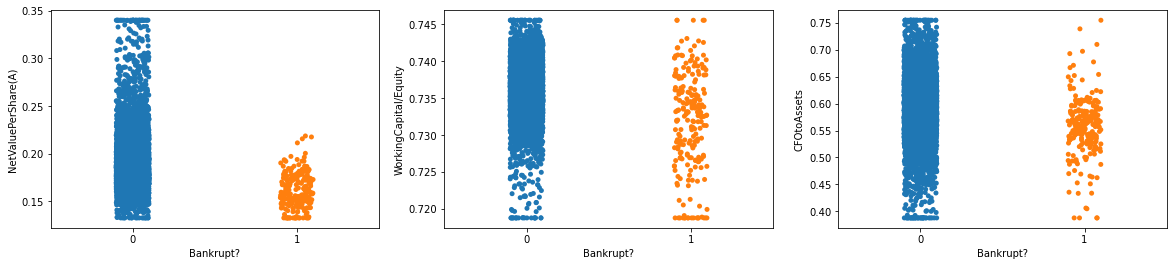

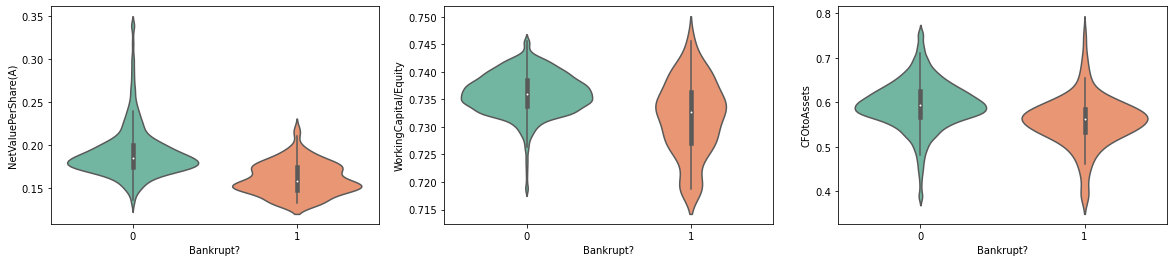

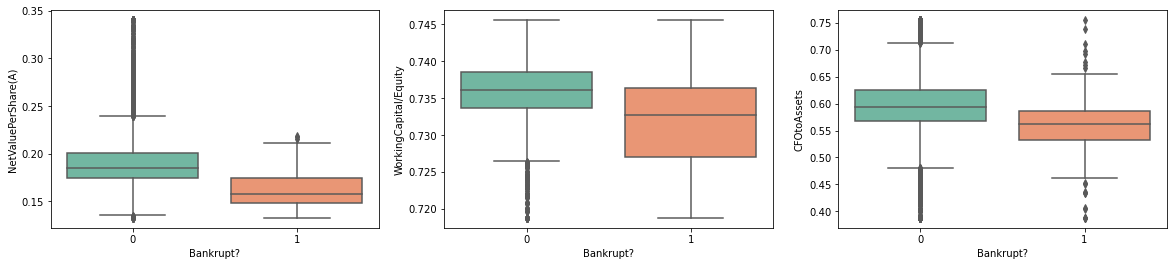

In [46]:
#Relación entre variables con correlación negativa y variable objetivo (continuación)

fig, axs = plt.subplots(1, 3, figsize=(20, 4))

sns.stripplot(x = new_df['Bankrupt?'], y = new_df['NetValuePerShare(A)'], data=new_df, ax=axs[0])
sns.stripplot(x = new_df['Bankrupt?'], y = new_df['WorkingCapital/Equity'], data=new_df, ax=axs[1])
sns.stripplot(x = new_df['Bankrupt?'], y = new_df['CFOtoAssets'], data=new_df, ax=axs[2])


fig, axs = plt.subplots(1, 3, figsize=(20, 4))

sns.violinplot(x = new_df['Bankrupt?'], y = new_df['NetValuePerShare(A)'], data=new_df,palette = 'Set2', ax=axs[0])
sns.violinplot(x = new_df['Bankrupt?'], y = new_df['WorkingCapital/Equity'], data=new_df,palette = 'Set2', ax=axs[1])
sns.violinplot(x = new_df['Bankrupt?'], y = new_df['CFOtoAssets'], data=new_df,palette = 'Set2', ax=axs[2])


fig, axs = plt.subplots(1, 3, figsize=(20, 4))

sns.boxplot(x = new_df['Bankrupt?'], y = new_df['NetValuePerShare(A)'], data=new_df,palette = 'Set2', ax=axs[0])
sns.boxplot(x = new_df['Bankrupt?'], y = new_df['WorkingCapital/Equity'], data=new_df,palette = 'Set2', ax=axs[1])
sns.boxplot(x = new_df['Bankrupt?'], y = new_df['CFOtoAssets'], data=new_df,palette = 'Set2', ax=axs[2])



plt.show()

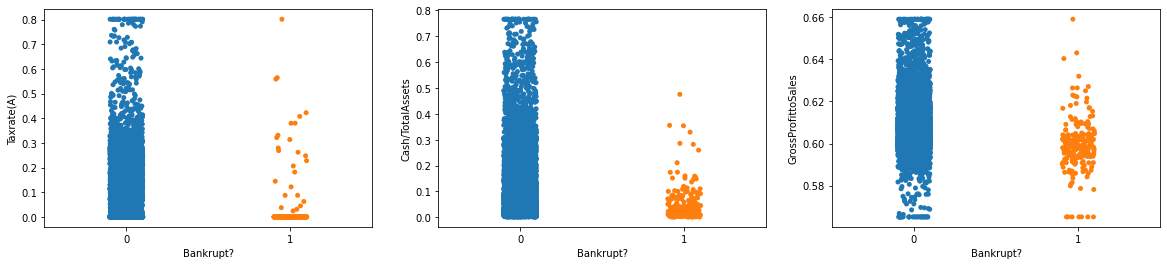

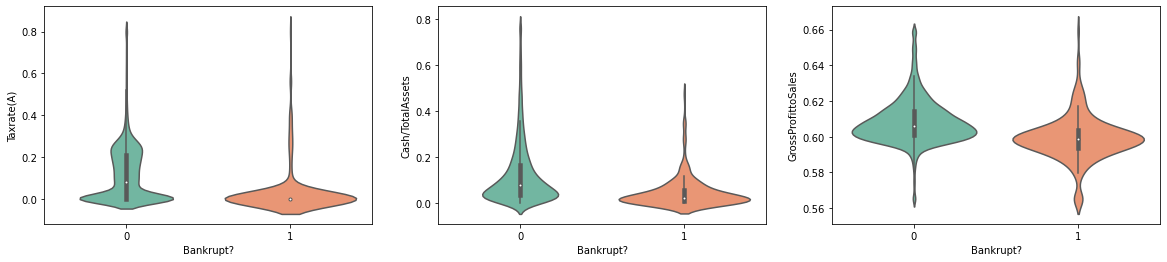

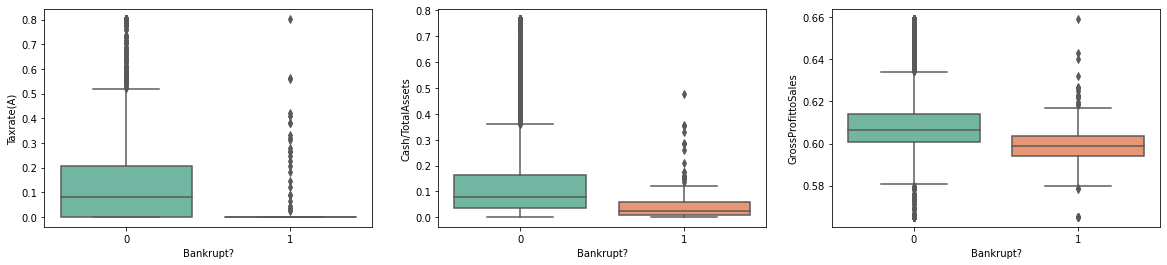

In [47]:
#Relación entre variables con correlación negativa y variable objetivo (continuación)

fig, axs = plt.subplots(1, 3, figsize=(20, 4))

sns.stripplot(x = new_df['Bankrupt?'], y = new_df['Taxrate(A)'], data=new_df, ax=axs[0])
sns.stripplot(x = new_df['Bankrupt?'], y = new_df['Cash/TotalAssets'], data=new_df, ax=axs[1])
sns.stripplot(x = new_df['Bankrupt?'], y = new_df['GrossProfittoSales'], data=new_df, ax=axs[2])


fig, axs = plt.subplots(1, 3, figsize=(20, 4))

sns.violinplot(x = new_df['Bankrupt?'], y = new_df['Taxrate(A)'], data=new_df,palette = 'Set2', ax=axs[0])
sns.violinplot(x = new_df['Bankrupt?'], y = new_df['Cash/TotalAssets'], data=new_df,palette = 'Set2', ax=axs[1])
sns.violinplot(x = new_df['Bankrupt?'], y = new_df['GrossProfittoSales'], data=new_df,palette = 'Set2', ax=axs[2])


fig, axs = plt.subplots(1, 3, figsize=(20, 4))

sns.boxplot(x = new_df['Bankrupt?'], y = new_df['Taxrate(A)'], data=new_df,palette = 'Set2', ax=axs[0])
sns.boxplot(x = new_df['Bankrupt?'], y = new_df['Cash/TotalAssets'], data=new_df,palette = 'Set2', ax=axs[1])
sns.boxplot(x = new_df['Bankrupt?'], y = new_df['GrossProfittoSales'], data=new_df,palette = 'Set2', ax=axs[2])



plt.show()

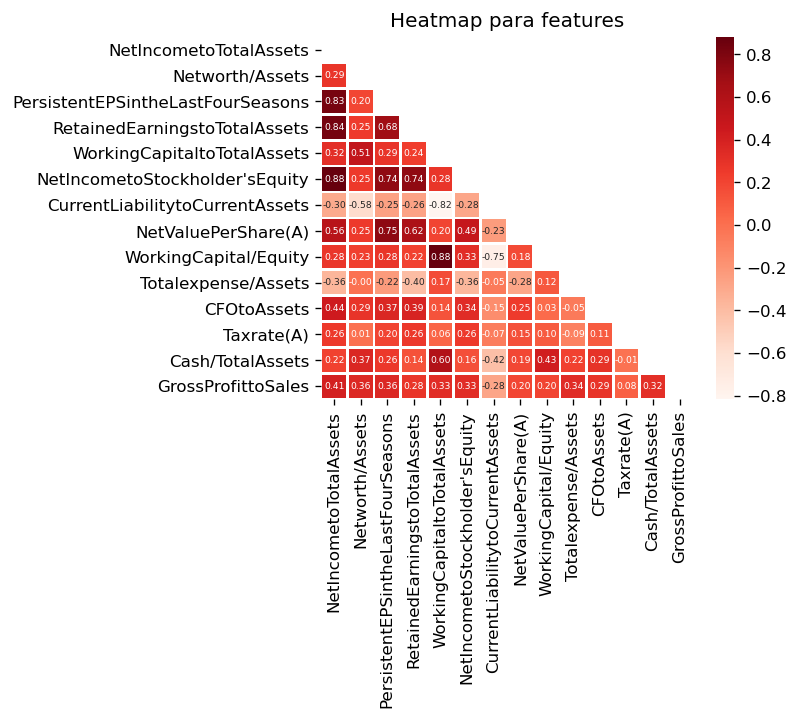

In [48]:
#Correlación entre todos los features
df_reduced_neg_pos = new_df.drop(['Bankrupt?'], axis=1)

plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df_reduced_neg_pos.corr(),dtype = bool))
sns.heatmap(df_reduced_neg_pos.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'Reds', annot_kws={"size":5.5})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Heatmap para features')
plt.show()

In [49]:
#Relación entre variables reducidas (con correlación positiva y correlación negativa) y variable objetivo
#sns.pairplot(new_df, hue='Bankrupt?', height = 3, palette = 'Set2')

# Construcción del Modelo de Predicción

## Algoritmos de Clasificación

### Regresión Logística

In [50]:
#Definimos features (X) y variable objetivo
X = new_df.drop(['Bankrupt?'], axis=1)
y = new_df['Bankrupt?']

scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

#Se separa muestra entre train y test
X_train_lrm, X_test_lrm, y_train_lrm, y_test_lrm = train_test_split(X_scale, y, test_size=0.3, random_state=1234)

#Se rebalancea la muestra
sm = SMOTE(sampling_strategy='minority', random_state=2)
X_train_lrm_res, y_train_lrm_res = sm.fit_resample(X_train_lrm, y_train_lrm)

#Se construye el modelo
regresion_logistica = LogisticRegression()
regresion_logistica.fit(X_train_lrm_res,y_train_lrm_res)

LogisticRegression()

In [51]:
y_train_pred_lrm = regresion_logistica.predict(X_train_lrm_res)
y_test_pred_lrm = regresion_logistica.predict(X_test_lrm)

In [52]:
train_accuracy_lrm = accuracy_score(y_train_lrm_res, y_train_pred_lrm)

In [53]:
test_accuracy_lrm = accuracy_score(y_test_lrm, y_test_pred_lrm)

In [54]:
class_probabilities = regresion_logistica.predict_proba(X_test_lrm)
preds = class_probabilities[:, 1]
fpr_lrm, tpr_lrm, threshold = roc_curve(y_test_lrm, preds)
roc_auc_lrm = auc(fpr_lrm, tpr_lrm)

### SVM

In [55]:
#Definimos features (X) y variable objetivo
X = new_df.drop(['Bankrupt?'], axis=1)
y = new_df['Bankrupt?']

#Se separa muestra entre train y test
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split( X, y.values.reshape(-1,1), test_size   = 0.3, random_state = 1234, shuffle = True)

#Se rebalancea la muestra
X_train_svm_res, y_train_svm_res = sm.fit_resample(X_train_svm, y_train_svm)

#Se construye el modelo 
SVM = SVC(C = 100, kernel = 'linear', random_state=123, probability=True)
SVM.fit(X_train_svm_res, y_train_svm_res)

SVC(C=100, kernel='linear', probability=True, random_state=123)

In [56]:
#Predicciones
y_train_pred_svm = SVM.predict(X_train_svm_res)
y_test_pred_svm = SVM.predict(X_test_svm)

In [57]:
train_accuracy_svm = accuracy_score(y_train_svm_res, y_train_pred_svm)

In [58]:
test_accuracy_svm = accuracy_score(y_test_svm, y_test_pred_svm)

In [59]:
class_probabilities = SVM.predict_proba(X_test_svm)
preds = class_probabilities[:, 1]
fpr_svm, tpr_svm, threshold = roc_curve(y_test_svm, preds)
roc_auc_svm = auc(fpr_svm, tpr_svm)

### Árbol de Decisión

In [60]:
#Definimos features (X) y variable objetivo
X = new_df.drop(['Bankrupt?'], axis=1)
y = new_df['Bankrupt?']

#Se separa muestra entre train y test
(X_train_dt, X_test_dt,y_train_dt, y_test_dt) = train_test_split(X, y, stratify=y, test_size=0.20, random_state=11)

#Se rebalancea la muestra
sm = SMOTE(sampling_strategy='minority', random_state=2)
X_train_dt_res, y_train_dt_res = sm.fit_resample(X_train_dt, y_train_dt)

#Se construye el modelo
tree = DecisionTreeClassifier(random_state=11)
tree.fit(X_train_dt_res, y_train_dt_res)

DecisionTreeClassifier(random_state=11)

In [61]:
y_train_pred_dt = tree.predict(X_train_dt_res)
y_test_pred_dt = tree.predict(X_test_dt)

In [62]:
train_accuracy_dt = accuracy_score(y_train_dt_res, y_train_pred_dt)

In [63]:
test_accuracy_dt = accuracy_score(y_test_dt, y_test_pred_dt)

In [64]:
class_probabilities = tree.predict_proba(X_test_dt)
preds = class_probabilities[:, 1]
fpr_dt, tpr_dt, threshold = roc_curve(y_test_dt, preds)
roc_auc_dt = auc(fpr_dt, tpr_dt)

## Bosque Aleatorio

In [65]:
#Definimos features (X) y variable objetivo
X = new_df.drop(['Bankrupt?'], axis=1)
y = new_df['Bankrupt?']

#Se separa muestra entre train y test
(X_train_rf, X_test_rf,y_train_rf, y_test_rf) = train_test_split(X, y, stratify=y, test_size=0.2, random_state=11)

#Se rebalancea la muestra
sm = SMOTE(sampling_strategy='minority', random_state=2)
X_train_rf_res, y_train_rf_res = sm.fit_resample(X_train_rf, y_train_rf)

#Se construye el modelo
rf = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
rf.fit(X_train_rf_res, y_train_rf_res)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [66]:
y_train_pred_rf = rf.predict(X_train_rf_res)
y_test_pred_rf = rf.predict(X_test_rf)

In [67]:
train_accuracy_rf = accuracy_score(y_train_rf_res, y_train_pred_rf)

In [68]:
test_accuracy_rf = accuracy_score(y_test_rf, y_test_pred_rf)

In [69]:
class_probabilities = rf.predict_proba(X_test_rf)
preds = class_probabilities[:, 1]
fpr_rf, tpr_rf, threshold = roc_curve(y_test_rf, preds)
roc_auc_rf = auc(fpr_rf, tpr_rf)

## Evaluación del desempeño los modelos

Evaluación Métricas de Modelos 

Regresión Logística 

% de aciertos sobre el set de evaluación: 88.2
% de aciertos sobre el set de evaluación: 86.6 

Reporte de clasificación 

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1981
           1       0.17      0.80      0.27        65

    accuracy                           0.87      2046
   macro avg       0.58      0.83      0.60      2046
weighted avg       0.97      0.87      0.91      2046
 

Matriz de confusión 



C:\Users\ignac\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


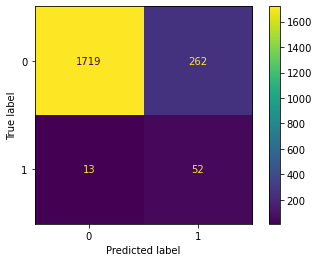



AUC: 0.9135867665903001 



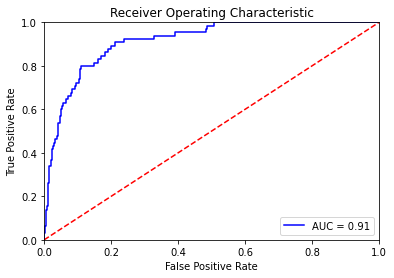







SVM 

% de aciertos sobre el set de evaluación: 88.3
% de aciertos sobre el set de evaluación: 85.3 

Reporte de clasificación 

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1981
           1       0.16      0.82      0.26        65

    accuracy                           0.85      2046
   macro avg       0.57      0.84      0.59      2046
weighted avg       0.97      0.85      0.90      2046
 

Matriz de confusión 



C:\Users\ignac\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


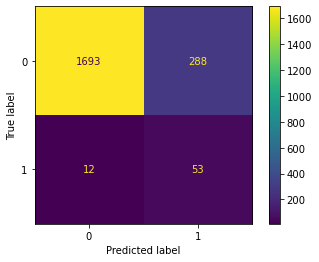



AUC: 0.9118704616937832 



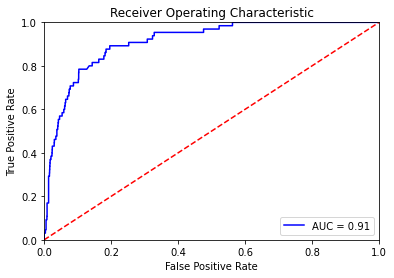







Árbol de Decisión 

% de aciertos sobre el set de evaluación: 100.0
% de aciertos sobre el set de evaluación: 91.6 

Reporte de clasificación 

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1320
           1       0.18      0.43      0.25        44

    accuracy                           0.92      1364
   macro avg       0.58      0.68      0.60      1364
weighted avg       0.95      0.92      0.93      1364
 

Matriz de confusión 



C:\Users\ignac\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


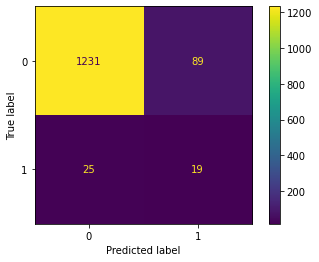



AUC: 0.6821969696969697 



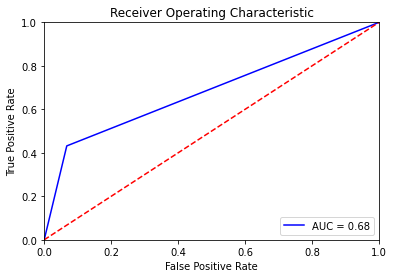

Bosque Aleatorio 

% de aciertos sobre el set de evaluación: 100.0
% de aciertos sobre el set de evaluación: 95.3 

Reporte de clasificación 

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1320
           1       0.36      0.61      0.46        44

    accuracy                           0.95      1364
   macro avg       0.68      0.79      0.72      1364
weighted avg       0.97      0.95      0.96      1364
 

Matriz de confusión 



C:\Users\ignac\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


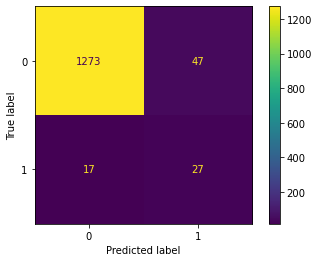



AUC: 0.9081525482093664 



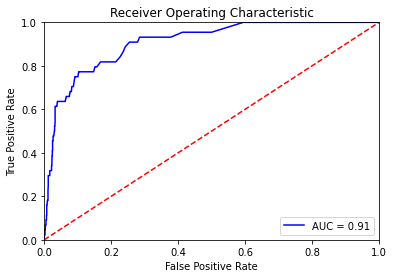

In [70]:
#Resumen de métricas de performance de los modelos

class color:
   BOLD = '\033[1m'
   END = '\033[0m'
    
print(color.BOLD + 'Evaluación Métricas de Modelos' + color.END,"\n")
print(color.BOLD + 'Regresión Logística' + color.END,"\n")
print('% de aciertos sobre el set de entrenamiento:',round(train_accuracy_lrm*100,1))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_lrm*100,1), "\n")
print("Reporte de clasificación", "\n")
print(classification_report(y_test_lrm, y_test_pred_lrm), "\n")
print("Matriz de confusión", "\n")
plot_confusion_matrix(regresion_logistica, X_test_lrm, y_test_lrm)
plt.show()
print("\n")
print(f"AUC: {roc_auc_lrm}", "\n")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lrm, tpr_lrm, 'b', label = 'AUC = %0.2f' % roc_auc_lrm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("\n")
print("\n")
print("\n")

print(color.BOLD + 'SVM' + color.END,"\n")
print('% de aciertos sobre el set de entrenamiento:',round(train_accuracy_svm*100,1))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_svm*100,1), "\n")
print("Reporte de clasificación", "\n")
print(classification_report(y_test_svm, y_test_pred_svm), "\n")
print("Matriz de confusión", "\n")
plot_confusion_matrix(SVM, X_test_svm, y_test_svm)
plt.show()
print("\n")
print(f"AUC: {roc_auc_svm}", "\n")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_svm, tpr_svm, 'b', label = 'AUC = %0.2f' % roc_auc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("\n")
print("\n")
print("\n")

print(color.BOLD + 'Árbol de Decisión' + color.END,"\n")
print('% de aciertos sobre el set de entrenamiento:',round(train_accuracy_dt*100,1))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_dt*100,1), "\n")
print("Reporte de clasificación", "\n")
print(classification_report(y_test_dt, y_test_pred_dt), "\n")
print("Matriz de confusión", "\n")
plot_confusion_matrix(tree, X_test_dt, y_test_dt)
plt.show()
print("\n")
print(f"AUC: {roc_auc_dt}", "\n")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_dt, tpr_dt, 'b', label = 'AUC = %0.2f' % roc_auc_dt)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print(color.BOLD + 'Bosque Aleatorio' + color.END,"\n")
print('% de aciertos sobre el set de entrenamiento:',round(train_accuracy_rf*100,1))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_rf*100,1), "\n")
print("Reporte de clasificación", "\n")
print(classification_report(y_test_rf, y_test_pred_rf), "\n")
print("Matriz de confusión", "\n")
plot_confusion_matrix(rf, X_test_rf, y_test_rf)
plt.show()
print("\n")
print(f"AUC: {roc_auc_rf}", "\n")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_rf, tpr_rf, 'b', label = 'AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()